### 13장 텐서플로를 사용하여 신경망 훈련
- 2) 입력 파이프라인 구축
--- 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

---
#### 1. 데이터셋 만들기
- tf.data.Dataset.from_tensor_slices()를 사용해 데이터가 텐서, 리스트, array 등일때 쉽게 데이터셋을 만들 수 있다. 
  - Dataset class 객체 반환하며, 여러개의 텐서를 바로 연결할 수도 있다. 
- map() : 변환을 적용 
- shuffle() : 데이터를 섞는다. 
- batch() : 훈련용 데이터를 만들기 위해, 배치로 나눈다. 
- repeat() : 반복 
---

In [2]:
import tensorflow as tf

a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]
ds = tf.data.Dataset.from_tensor_slices(a)
print(ds)

for i in ds: 
    print(i)

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.float32, name=None)>
tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [3]:
## 텐서의 결합 
tf.random.set_seed(1)
t_x = tf.random.uniform([4,3], dtype = tf.float32)
t_y = tf.range(4)
print(t_x, '\n', t_y)

tf.Tensor(
[[0.16513085 0.9014813  0.6309742 ]
 [0.4345461  0.29193902 0.64250207]
 [0.9757855  0.43509948 0.6601019 ]
 [0.60489583 0.6366315  0.6144488 ]], shape=(4, 3), dtype=float32) 
 tf.Tensor([0 1 2 3], shape=(4,), dtype=int32)


In [4]:
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))
print(ds_joint)

for j in ds_joint: 
    print('x=', j[0], 
          'y=', j[1])

<TensorSliceDataset element_spec=(TensorSpec(shape=(3,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>
x= tf.Tensor([0.16513085 0.9014813  0.6309742 ], shape=(3,), dtype=float32) y= tf.Tensor(0, shape=(), dtype=int32)
x= tf.Tensor([0.4345461  0.29193902 0.64250207], shape=(3,), dtype=float32) y= tf.Tensor(1, shape=(), dtype=int32)
x= tf.Tensor([0.9757855  0.43509948 0.6601019 ], shape=(3,), dtype=float32) y= tf.Tensor(2, shape=(), dtype=int32)
x= tf.Tensor([0.60489583 0.6366315  0.6144488 ], shape=(3,), dtype=float32) y= tf.Tensor(3, shape=(), dtype=int32)


In [5]:
## map()을 사용한 변환 
## ds_joint는 0~1값의 uniform 분포 --> -1 ~ +1 값을 가지는 분포로 변환한다. 
ds_trans = ds_joint.map(lambda x, y : (x*2 - 1, y))
print(ds_trans)

for k in ds_trans: 
    print('x=', k[0], 
          'y=', k[1])

<MapDataset element_spec=(TensorSpec(shape=(3,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>
x= tf.Tensor([-0.6697383   0.80296254  0.26194835], shape=(3,), dtype=float32) y= tf.Tensor(0, shape=(), dtype=int32)
x= tf.Tensor([-0.13090777 -0.41612196  0.28500414], shape=(3,), dtype=float32) y= tf.Tensor(1, shape=(), dtype=int32)
x= tf.Tensor([ 0.951571   -0.12980103  0.32020378], shape=(3,), dtype=float32) y= tf.Tensor(2, shape=(), dtype=int32)
x= tf.Tensor([0.20979166 0.27326298 0.22889757], shape=(3,), dtype=float32) y= tf.Tensor(3, shape=(), dtype=int32)


In [6]:
## SGDGradient를 위해서 데이터를 무작위로 섞어 배치로 만들어 주는 것이 좋다. 
## shuffle() : buffer_size를 기준으로 무작위로 섞는다. 
tf.random.set_seed(1)
ds = ds_joint.shuffle(buffer_size = len(t_x))  ## 샘플(t_x)의 갯수와 동일한 숫자를 꺼내어 섞는다. (완벽한 랜덤 셔플)
print(ds)

for i in ds: 
    print('x=', i[0], 
          'y=', i[1])

<ShuffleDataset element_spec=(TensorSpec(shape=(3,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>
x= tf.Tensor([0.9757855  0.43509948 0.6601019 ], shape=(3,), dtype=float32) y= tf.Tensor(2, shape=(), dtype=int32)
x= tf.Tensor([0.4345461  0.29193902 0.64250207], shape=(3,), dtype=float32) y= tf.Tensor(1, shape=(), dtype=int32)
x= tf.Tensor([0.16513085 0.9014813  0.6309742 ], shape=(3,), dtype=float32) y= tf.Tensor(0, shape=(), dtype=int32)
x= tf.Tensor([0.60489583 0.6366315  0.6144488 ], shape=(3,), dtype=float32) y= tf.Tensor(3, shape=(), dtype=int32)


In [7]:
## batch() : batch_size만큼 나누어 배치를 만든다.  
ds = ds_joint.batch(batch_size = 3, drop_remainder = False)
batch_x, batch_y = next(iter(ds))                    

print(batch_x) 
print(batch_y) 

tf.Tensor(
[[0.16513085 0.9014813  0.6309742 ]
 [0.4345461  0.29193902 0.64250207]
 [0.9757855  0.43509948 0.6601019 ]], shape=(3, 3), dtype=float32)
tf.Tensor([0 1 2], shape=(3,), dtype=int32)


In [8]:
## repeat() : 훈련에 필요한 epochs만큼 배치 데이터셋을 추출한다. 
ds = ds_joint.batch(batch_size = 3).repeat(count=2)

for i, (batch_x, batch_y) in enumerate(ds): 
    print(i, batch_x.shape, batch_y.shape, batch_y)

0 (3, 3) (3,) tf.Tensor([0 1 2], shape=(3,), dtype=int32)
1 (1, 3) (1,) tf.Tensor([3], shape=(1,), dtype=int32)
2 (3, 3) (3,) tf.Tensor([0 1 2], shape=(3,), dtype=int32)
3 (1, 3) (1,) tf.Tensor([3], shape=(1,), dtype=int32)


- 통상 shuffle > batch > repeat 순서로 작업한다. (순서가 바뀌면 이상한 결과가 나올 수도 ...) 

---
#### 2. 개, 고양이 사진으로 데이터셋 만들기 
---

In [11]:
import pathlib
imgdir_path = pathlib.Path('img/cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
file_list

['img\\cat_dog_images\\cat-01.jpg',
 'img\\cat_dog_images\\cat-02.jpg',
 'img\\cat_dog_images\\cat-03.jpg',
 'img\\cat_dog_images\\dog-01.jpg',
 'img\\cat_dog_images\\dog-02.jpg',
 'img\\cat_dog_images\\dog-03.jpg']

image_size = (900, 1200, 3)
image_size = (900, 1200, 3)
image_size = (900, 742, 3)
image_size = (800, 1200, 3)
image_size = (800, 1200, 3)
image_size = (900, 1200, 3)


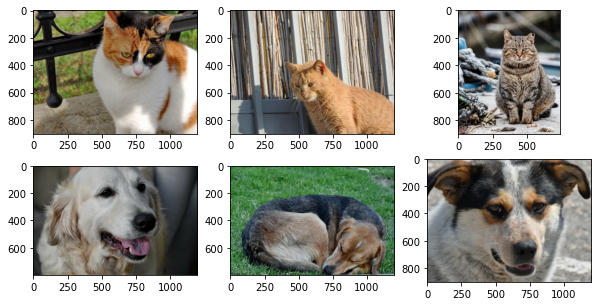

In [13]:
## tf.io : 이미지 파일 reading 
## tf.image : 이미지 디코딩 & 크기 변경 
fig = plt.figure(figsize = (10,5))
for i, file in enumerate(file_list): 
    img_raw = tf.io.read_file(file)   
    img = tf.image.decode_image(img_raw)
    print('image_size =', img.shape)
    
    ax = fig.add_subplot(2,3, i+1)
    ax.imshow(img) 
             
plt.show()

In [21]:
## 파일이름으로 부터 추출하여, 고양이:0, 개:1 할당 
import os 
labels = [1 if 'dog' in os.path.basename(file) else 0 
         for file in file_list]
labels

[0, 0, 0, 1, 1, 1]

In [22]:
## file_list와 label을 연결하여 텐서 데이터셋 구성 
ds_files_labels = tf.data.Dataset.from_tensor_slices((file_list, labels))

for item in ds_files_labels: 
    print(item[0], item[1])

tf.Tensor(b'img\\cat_dog_images\\cat-01.jpg', shape=(), dtype=string) tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(b'img\\cat_dog_images\\cat-02.jpg', shape=(), dtype=string) tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(b'img\\cat_dog_images\\cat-03.jpg', shape=(), dtype=string) tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(b'img\\cat_dog_images\\dog-01.jpg', shape=(), dtype=string) tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(b'img\\cat_dog_images\\dog-02.jpg', shape=(), dtype=string) tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(b'img\\cat_dog_images\\dog-03.jpg', shape=(), dtype=string) tf.Tensor(1, shape=(), dtype=int32)


In [24]:
## 함수: 이미지 로딩 & 디코딩, 사이즈 변경, 데이터셋 반환 
def load_and_preprocess(path, label): 
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0   ## 픽셀값을 255로 나누어 0~1사이의 값으로 만듬 
    return image, label 

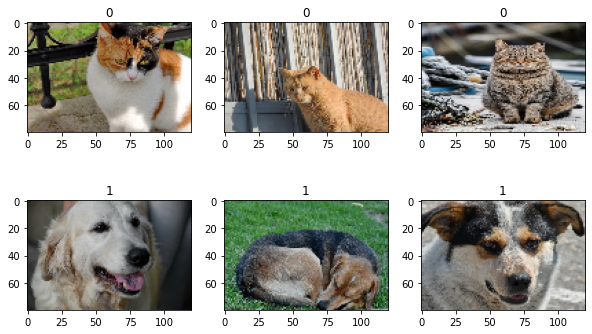

In [28]:
img_width, img_height = 120, 80
ds_images_lables = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize = (10,6))
for i, example in enumerate(ds_images_lables): 
    ax = fig.add_subplot(2,3, i+1)
    ax.imshow(example[0])
    ax.set_title(example[1].numpy())
    
plt.show()

--- 
#### 3. tensorflow_datasets에서 데이터 로드 : celeb_a, MNIST 
---

In [40]:
## tensorflow_datasets에서 가용 데이터 확인 : tensorflow_datasets.list_builders()
#!pip install tensorflow_datasets
import tensorflow_datasets as tfds
print('-가용 데이터셋 = ', len(tfds.list_builders()), '개')

-가용 데이터셋 =  356 개


In [51]:
## mnist 데이터셋 로드 
mnist, mnist_info = tfds.load('mnist', with_info= True, shuffle_files = False)
mnist

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Seoyeon\tensorflow_datasets\mnist\3.0.1.incompleteEZ0JJY\mnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Seoyeon\tensorflow_datasets\mnist\3.0.1.incompleteEZ0JJY\mnist-test.tfrecord*...:   0%|    …

Dataset mnist downloaded and prepared to C:\Users\Seoyeon\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


{Split('train'): <PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>,
 Split('test'): <PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [53]:
mnist_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\Seoyeon\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",

- C:\Users\Seoyeon\tensorflow_datasets\mnist\3.0.1. 폴더에 데이터 다운로드 되었음 
- 28 x 28 x 1 사이즈의 이미지 데이터
- train 6000, test 1000으로 구분되어 있음 

(10, 28, 28, 1) tf.Tensor([4 1 0 7 8 1 2 7 1 6], shape=(10,), dtype=int64)


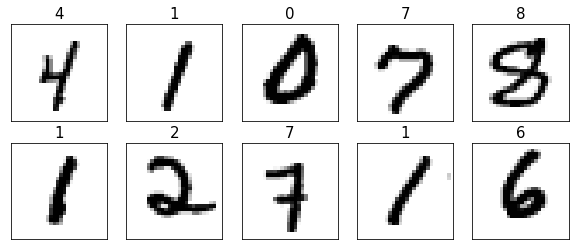

In [58]:
## 원소를 튜플로 변환하고 열개의 샘플 출력 
ds_train = mnist['train']
assert isinstance(ds_train, tf.data.Dataset)

ds_train = ds_train.map(lambda item: (item['image'], item['label']))

ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1])

fig = plt.figure(figsize=(10, 4))
for i,(image,label) in enumerate(zip(batch[0], batch[1])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image[:, :, 0], cmap='gray_r')
    ax.set_title('{}'.format(label), size=15)

# plt.savefig('images/13_4.png', dpi=300)
plt.show()

In [65]:
## 같은 방식으로 cifar100 데이터셋 로드 
cifar100, cifar100_info = tfds.load('cifar100', with_info= True, shuffle_files = False)
cifar100

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Seoyeon\tensorflow_datasets\cifar100\3.0.2.incompleteGEEGX8\cifar100-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Seoyeon\tensorflow_datasets\cifar100\3.0.2.incompleteGEEGX8\cifar100-test.tfrecord*...:   0…

Dataset cifar100 downloaded and prepared to C:\Users\Seoyeon\tensorflow_datasets\cifar100\3.0.2. Subsequent calls will reuse this data.


{Split('train'): <PrefetchDataset element_spec={'coarse_label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'id': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>,
 Split('test'): <PrefetchDataset element_spec={'coarse_label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'id': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [66]:
cifar100_info

tfds.core.DatasetInfo(
    name='cifar100',
    full_name='cifar100/3.0.2',
    description="""
    This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path='C:\\Users\\Seoyeon\\tensorflow_datasets\\cifar100\\3.0.2',
    file_format=tfrecord,
    download_size=160.71 MiB,
    dataset_size=132.03 MiB,
    features=FeaturesDict({
        'coarse_label': ClassLabel(shape=(), dtype=int64, num_classes=20),
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=100),
    }),
    supervised_keys=('image', 'label'),

(10, 32, 32, 3) tf.Tensor([66 23 40 39  7 15 11 44 76 50], shape=(10,), dtype=int64)


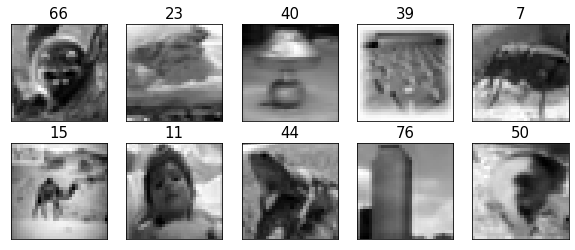

In [96]:
## 원소를 튜플로 변환하고 열개의 샘플 출력 
ds_train = cifar100['train']
assert isinstance(ds_train, tf.data.Dataset)

ds_train = ds_train.map(lambda item: (item['image'], item['label']))

ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1])

fig = plt.figure(figsize=(10, 4))
for i,(image,label) in enumerate(zip(batch[0], batch[1])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
           
    ax.imshow(image[:, :, 0], cmap='gray')
    ax.set_title('{}'.format(label), size=15)

# plt.savefig('images/13_4.png', dpi=300)
plt.show()